USING THE DATA: ASIK RT4 NWIN CLND BLNCD


RT4: 64 scans,

NWIN: WITH NEW INDO SAMPLES SCANS,

CLND: CLEANED FROM OUTLIERS,

BLNCD: THE TOTAL NUMBER ALREADY BALANCED BETWEEN THAI AND NON-THAI

ONLY SPECIFIC REGIONS + SMOOTHED

In [1]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv('data/data file 2/data_1_smoothed.csv')

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 1584 entries, prov_char to 731.853
dtypes: float64(1576), object(8)
memory usage: 3.7+ MB


(None,
   prov_char country_char               wavenumber tgp_name dgp_name fgp_name  \
 0       SUX           ID  ID-SUX-069-2309-002_005  Group 3  Group 2  Group 3   
 1       SUX           ID  ID-SUX-074-2311-001_005  Group 3  Group 2  Group 3   
 2       KTX           ID  ID-KTX-068-2306-002_104  Group 3  Group 2  Group 4   
 3       SGR           MY  MY-SGR-096-2401-002_NCB  Group 2  Group 2  Group 3   
 4       SSX           ID  ID-SSX-068-2307-028_202  Group 3  Group 2  Group 3   
 
   country_name thnoth_name  2996.355  2996.837  ...   727.514   727.996  \
 0    Indonesia    Non-Thai  0.000696  0.000675  ...  0.001172  0.001061   
 1    Indonesia    Non-Thai -0.000272 -0.000274  ...  0.000062  0.000089   
 2    Indonesia    Non-Thai -0.000840 -0.000835  ... -0.001045 -0.000874   
 3     Malaysia    Non-Thai -0.001029 -0.001003  ... -0.001168 -0.000975   
 4    Indonesia    Non-Thai -0.000948 -0.000939  ... -0.001179 -0.001054   
 
     728.478   728.961   729.443   729.925   73

In [2]:
print(data_0.describe(include='all'))

       prov_char country_char               wavenumber tgp_name dgp_name  \
count        304          304                      304      304      304   
unique        24            3                      302        3        2   
top          KTX           TH  ID-SSX-068-2307-028_001  Group 2  Group 2   
freq          41          152                        2      142      249   
mean         NaN          NaN                      NaN      NaN      NaN   
std          NaN          NaN                      NaN      NaN      NaN   
min          NaN          NaN                      NaN      NaN      NaN   
25%          NaN          NaN                      NaN      NaN      NaN   
50%          NaN          NaN                      NaN      NaN      NaN   
75%          NaN          NaN                      NaN      NaN      NaN   
max          NaN          NaN                      NaN      NaN      NaN   

       fgp_name country_name thnoth_name    2996.355    2996.837  ...  \
count       30

In [3]:
data_1 = data_0.copy()

In [4]:
# Delete the specified columns
data_1 = data_0.drop(columns=['country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char              sample_code tgp_name dgp_name fgp_name country_name  \
0       SUX  ID-SUX-069-2309-002_005  Group 3  Group 2  Group 3    Indonesia   
1       SUX  ID-SUX-074-2311-001_005  Group 3  Group 2  Group 3    Indonesia   
2       KTX  ID-KTX-068-2306-002_104  Group 3  Group 2  Group 4    Indonesia   
3       SGR  MY-SGR-096-2401-002_NCB  Group 2  Group 2  Group 3     Malaysia   
4       SSX  ID-SSX-068-2307-028_202  Group 3  Group 2  Group 3    Indonesia   

  thnoth_name  2996.355  2996.837   2997.32  ...   727.514   727.996  \
0    Non-Thai  0.000696  0.000675  0.000658  ...  0.001172  0.001061   
1    Non-Thai -0.000272 -0.000274 -0.000274  ...  0.000062  0.000089   
2    Non-Thai -0.000840 -0.000835 -0.000835  ... -0.001045 -0.000874   
3    Non-Thai -0.001029 -0.001003 -0.000981  ... -0.001168 -0.000975   
4    Non-Thai -0.000948 -0.000939 -0.000938  ... -0.001179 -0.001054   

    728.478   728.961   729.443   729.925   730.407   730.889   731.371  \
0  0.000964

In [5]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
data_2 = data_1.copy()

DGP

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.82      0.99      0.90       249

    accuracy                           0.81       304
   macro avg       0.41      0.50      0.45       304
weighted avg       0.67      0.81      0.73       304

Confusion Matrix for dgp_name:
[[  0  55]
 [  2 247]]


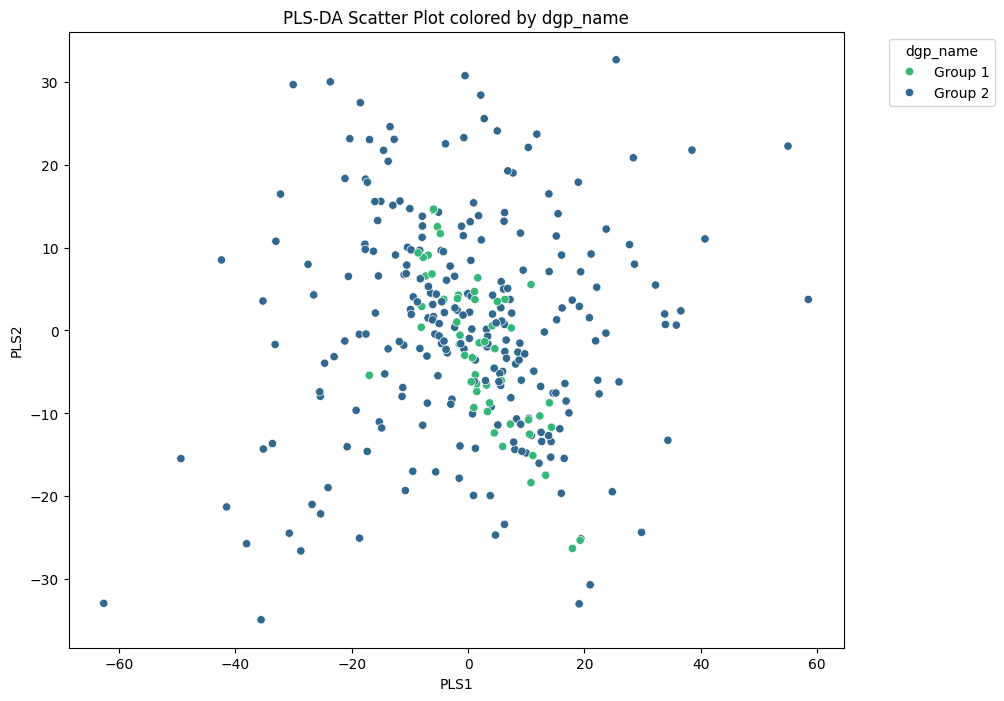

In [7]:
# Separate features and target variables
features_dgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_dgp = data_2['dgp_name']
groups_dgp = data_2['prov_char']

# Encode the target labels
label_encoder_dgp = LabelEncoder()
targets_encoded_dgp = label_encoder_dgp.fit_transform(targets_dgp)

# Standardize the features
scaler_dgp = StandardScaler()
X_scaled_dgp = scaler_dgp.fit_transform(features_dgp)

# Perform PLS-DA and LOGO-CV
pls_dgp = PLSRegression(n_components=2)
classifier_dgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_dgp = []
y_pred_dgp = []

for train_idx, test_idx in logo.split(X_scaled_dgp, targets_encoded_dgp, groups_dgp):
    X_train_dgp, X_test_dgp = X_scaled_dgp[train_idx], X_scaled_dgp[test_idx]
    y_train_dgp, y_test_dgp = targets_encoded_dgp[train_idx], targets_encoded_dgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_dgp = pls_dgp.fit_transform(X_train_dgp, y_train_dgp)[0]
    X_test_pls_dgp = pls_dgp.transform(X_test_dgp)
    
    # Train classifier
    classifier_dgp.fit(X_train_pls_dgp, y_train_dgp)
    
    # Predict
    y_pred_dgp.extend(classifier_dgp.predict(X_test_pls_dgp))
    y_true_dgp.extend(y_test_dgp)

# Evaluate the classifier
print("Classification Report for dgp_name:")
print(classification_report(y_true_dgp, y_pred_dgp))

print("Confusion Matrix for dgp_name:")
print(confusion_matrix(y_true_dgp, y_pred_dgp))

# Fit PLS-DA for visualization purposes
X_pls_dgp = pls_dgp.fit_transform(X_scaled_dgp, targets_encoded_dgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_dgp = pd.DataFrame(data=X_pls_dgp, columns=['PLS1', 'PLS2'])
pls_df_dgp['dgp_name'] = targets_dgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_dgp = sns.scatterplot(data=pls_df_dgp, x='PLS1', y='PLS2', hue='dgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by dgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_dgp, labels_dgp = scatter_dgp.get_legend_handles_labels()
sorted_labels_dgp = sorted(zip(labels_dgp, handles_dgp), key=lambda t: t[0])
labels_dgp, handles_dgp = zip(*sorted_labels_dgp)
plt.legend(handles_dgp, labels_dgp, title='dgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

TGP

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.28      0.34      0.31       142
           2       0.19      0.19      0.19       135

    accuracy                           0.24       304
   macro avg       0.16      0.17      0.16       304
weighted avg       0.21      0.24      0.23       304

Confusion Matrix for tgp_name:
[[  0  14  13]
 [  0  48  94]
 [  0 110  25]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

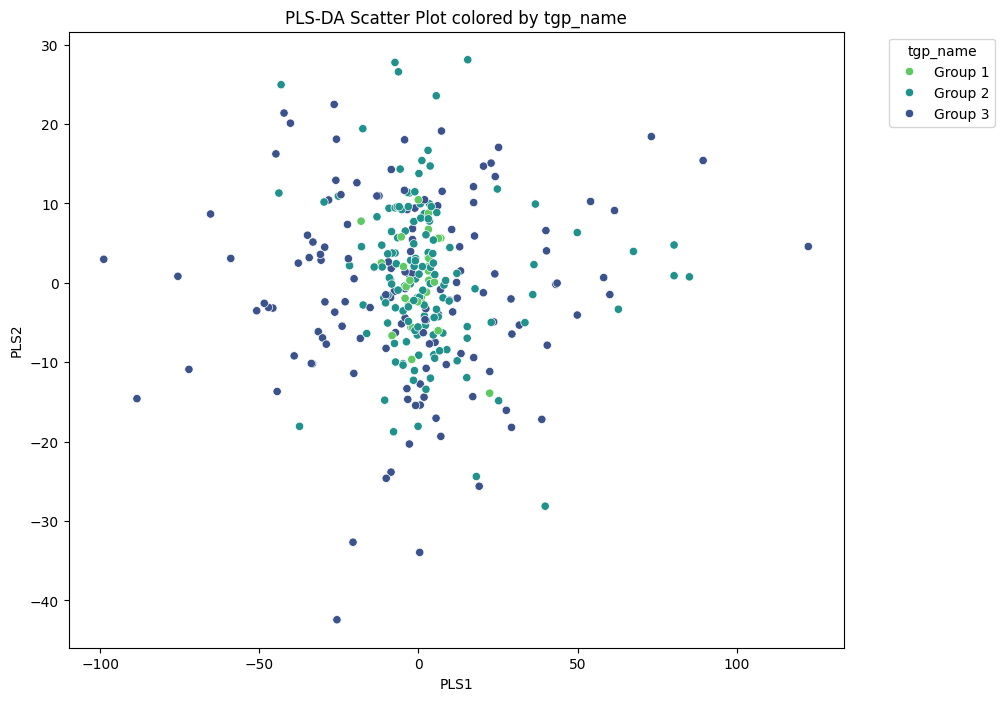

In [8]:
# Separate features and target variables
features_tgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_tgp = data_2['tgp_name']
groups_tgp = data_2['prov_char']

# Encode the target labels
label_encoder_tgp = LabelEncoder()
targets_encoded_tgp = label_encoder_tgp.fit_transform(targets_tgp)

# Standardize the features
scaler_tgp = StandardScaler()
X_scaled_tgp = scaler_tgp.fit_transform(features_tgp)

# Perform PLS-DA and LOGO-CV
pls_tgp = PLSRegression(n_components=2)
classifier_tgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_tgp = []
y_pred_tgp = []

for train_idx, test_idx in logo.split(X_scaled_tgp, targets_encoded_tgp, groups_tgp):
    X_train_tgp, X_test_tgp = X_scaled_tgp[train_idx], X_scaled_tgp[test_idx]
    y_train_tgp, y_test_tgp = targets_encoded_tgp[train_idx], targets_encoded_tgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_tgp = pls_tgp.fit_transform(X_train_tgp, y_train_tgp)[0]
    X_test_pls_tgp = pls_tgp.transform(X_test_tgp)
    
    # Train classifier
    classifier_tgp.fit(X_train_pls_tgp, y_train_tgp)
    
    # Predict
    y_pred_tgp.extend(classifier_tgp.predict(X_test_pls_tgp))
    y_true_tgp.extend(y_test_tgp)

# Evaluate the classifier
print("Classification Report for tgp_name:")
print(classification_report(y_true_tgp, y_pred_tgp))

print("Confusion Matrix for tgp_name:")
print(confusion_matrix(y_true_tgp, y_pred_tgp))

# Fit PLS-DA for visualization purposes
X_pls_tgp = pls_tgp.fit_transform(X_scaled_tgp, targets_encoded_tgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_tgp = pd.DataFrame(data=X_pls_tgp, columns=['PLS1', 'PLS2'])
pls_df_tgp['tgp_name'] = targets_tgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_tgp = sns.scatterplot(data=pls_df_tgp, x='PLS1', y='PLS2', hue='tgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_tgp, labels_tgp = scatter_tgp.get_legend_handles_labels()
sorted_labels_tgp = sorted(zip(labels_tgp, handles_tgp), key=lambda t: t[0])
labels_tgp, handles_tgp = zip(*sorted_labels_tgp)
plt.legend(handles_tgp, labels_tgp, title='tgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


FGP

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        74
           2       0.41      0.82      0.55       139
           3       0.00      0.00      0.00        69

    accuracy                           0.38       304
   macro avg       0.10      0.21      0.14       304
weighted avg       0.19      0.38      0.25       304

Confusion Matrix for fgp_name:
[[  0   0  22   0]
 [  0   0  74   0]
 [  0  14 114  11]
 [  0   0  69   0]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

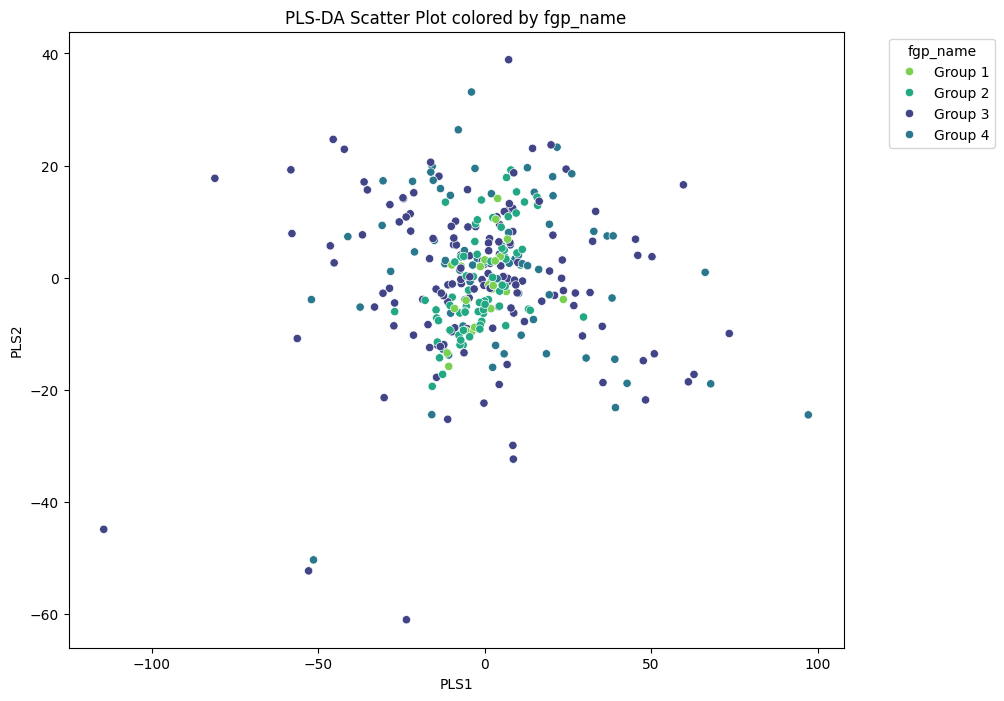

In [9]:
# Separate features and target variables
features_fgp = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_fgp = data_2['fgp_name']
groups_fgp = data_2['prov_char']

# Encode the target labels
label_encoder_fgp = LabelEncoder()
targets_encoded_fgp = label_encoder_fgp.fit_transform(targets_fgp)

# Standardize the features
scaler_fgp = StandardScaler()
X_scaled_fgp = scaler_fgp.fit_transform(features_fgp)

# Perform PLS-DA and LOGO-CV
pls_fgp = PLSRegression(n_components=2)
classifier_fgp = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_fgp = []
y_pred_fgp = []

for train_idx, test_idx in logo.split(X_scaled_fgp, targets_encoded_fgp, groups_fgp):
    X_train_fgp, X_test_fgp = X_scaled_fgp[train_idx], X_scaled_fgp[test_idx]
    y_train_fgp, y_test_fgp = targets_encoded_fgp[train_idx], targets_encoded_fgp[test_idx]
    
    # Fit PLS-DA
    X_train_pls_fgp = pls_fgp.fit_transform(X_train_fgp, y_train_fgp)[0]
    X_test_pls_fgp = pls_fgp.transform(X_test_fgp)
    
    # Train classifier
    classifier_fgp.fit(X_train_pls_fgp, y_train_fgp)
    
    # Predict
    y_pred_fgp.extend(classifier_fgp.predict(X_test_pls_fgp))
    y_true_fgp.extend(y_test_fgp)

# Evaluate the classifier
print("Classification Report for fgp_name:")
print(classification_report(y_true_fgp, y_pred_fgp))

print("Confusion Matrix for fgp_name:")
print(confusion_matrix(y_true_fgp, y_pred_fgp))

# Fit PLS-DA for visualization purposes
X_pls_fgp = pls_fgp.fit_transform(X_scaled_fgp, targets_encoded_fgp)[0]

# Create a DataFrame for the PLS-DA results
pls_df_fgp = pd.DataFrame(data=X_pls_fgp, columns=['PLS1', 'PLS2'])
pls_df_fgp['fgp_name'] = targets_fgp

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_fgp = sns.scatterplot(data=pls_df_fgp, x='PLS1', y='PLS2', hue='fgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by fgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_fgp, labels_fgp = scatter_fgp.get_legend_handles_labels()
sorted_labels_fgp = sorted(zip(labels_fgp, handles_fgp), key=lambda t: t[0])
labels_fgp, handles_fgp = zip(*sorted_labels_fgp)
plt.legend(handles_fgp, labels_fgp, title='fgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


country_name

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.04      0.03      0.03       139
           1       0.00      0.00      0.00        13
           2       0.26      0.32      0.28       152

    accuracy                           0.17       304
   macro avg       0.10      0.12      0.11       304
weighted avg       0.14      0.17      0.16       304

Confusion Matrix for country_name:
[[  4   3 132]
 [  2   0  11]
 [103   0  49]]


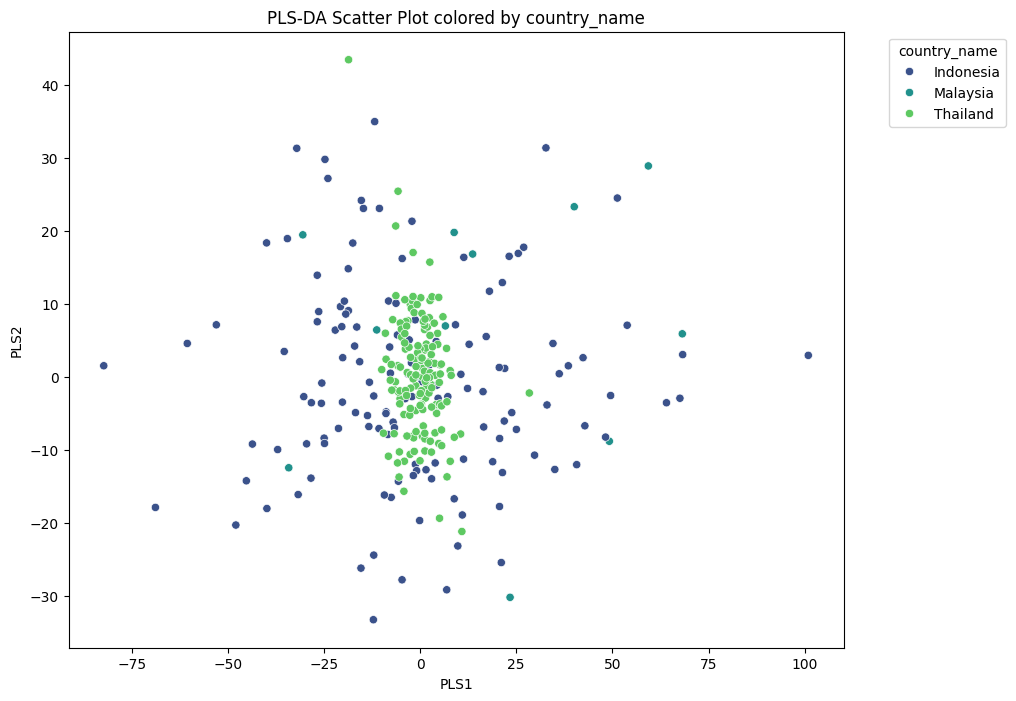

In [10]:
# Separate features and target variables
features_cnt = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_cnt = data_2['country_name']
groups_cnt = data_2['prov_char']

# Encode the target labels
label_encoder_cnt = LabelEncoder()
targets_encoded_cnt = label_encoder_cnt.fit_transform(targets_cnt)

# Standardize the features
scaler_cnt = StandardScaler()
X_scaled_cnt = scaler_cnt.fit_transform(features_cnt)

# Perform PLS-DA and LOGO-CV
pls_cnt = PLSRegression(n_components=2)
classifier_cnt = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_cnt = []
y_pred_cnt = []

for train_idx, test_idx in logo.split(X_scaled_cnt, targets_encoded_cnt, groups_cnt):
    X_train_cnt, X_test_cnt = X_scaled_cnt[train_idx], X_scaled_cnt[test_idx]
    y_train_cnt, y_test_cnt = targets_encoded_cnt[train_idx], targets_encoded_cnt[test_idx]
    
    # Fit PLS-DA
    X_train_pls_cnt = pls_cnt.fit_transform(X_train_cnt, y_train_cnt)[0]
    X_test_pls_cnt = pls_cnt.transform(X_test_cnt)
    
    # Train classifier
    classifier_cnt.fit(X_train_pls_cnt, y_train_cnt)
    
    # Predict
    y_pred_cnt.extend(classifier_cnt.predict(X_test_pls_cnt))
    y_true_cnt.extend(y_test_cnt)

# Evaluate the classifier
print("Classification Report for country_name:")
print(classification_report(y_true_cnt, y_pred_cnt))

print("Confusion Matrix for country_name:")
print(confusion_matrix(y_true_cnt, y_pred_cnt))

# Fit PLS-DA for visualization purposes
X_pls_cnt = pls_cnt.fit_transform(X_scaled_cnt, targets_encoded_cnt)[0]

# Create a DataFrame for the PLS-DA results
pls_df_cnt = pd.DataFrame(data=X_pls_cnt, columns=['PLS1', 'PLS2'])
pls_df_cnt['country_name'] = targets_cnt

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_cnt = sns.scatterplot(data=pls_df_cnt, x='PLS1', y='PLS2', hue='country_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by country_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_cnt, labels_cnt = scatter_cnt.get_legend_handles_labels()
sorted_labels_cnt = sorted(zip(labels_cnt, handles_cnt), key=lambda t: t[0])
labels_cnt, handles_cnt = zip(*sorted_labels_cnt)
plt.legend(handles_cnt, labels_cnt, title='country_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Thai/Non-Thai

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       152
           1       0.05      0.05      0.05       152

    accuracy                           0.05       304
   macro avg       0.05      0.05      0.05       304
weighted avg       0.05      0.05      0.05       304

Confusion Matrix for thnoth_name:
[[  7 145]
 [144   8]]


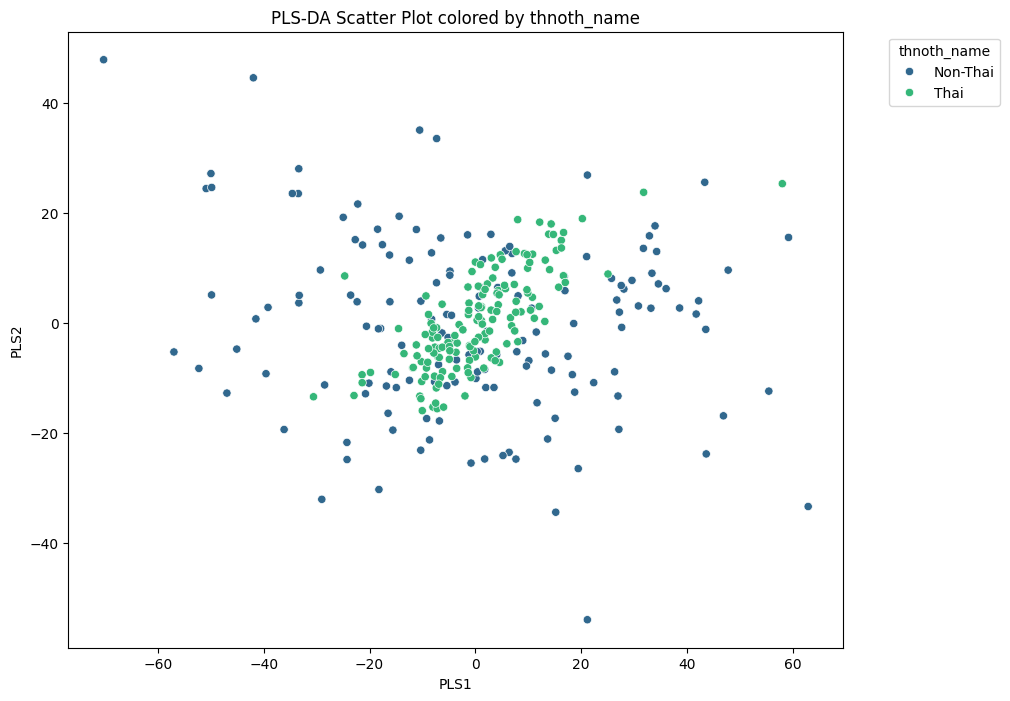

In [11]:
# Separate features and target variables
features_tnt = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_tnt = data_2['thnoth_name']
groups_tnt = data_2['prov_char']

# Encode the target labels
label_encoder_tnt = LabelEncoder()
targets_encoded_tnt = label_encoder_tnt.fit_transform(targets_tnt)

# Standardize the features
scaler_tnt = StandardScaler()
X_scaled_tnt = scaler_tnt.fit_transform(features_tnt)

# Perform PLS-DA and LOGO-CV
pls_tnt = PLSRegression(n_components=2)
classifier_tnt = LogisticRegression()

logo = LeaveOneGroupOut()
y_true_tnt = []
y_pred_tnt = []

for train_idx, test_idx in logo.split(X_scaled_tnt, targets_encoded_tnt, groups_tnt):
    X_train_tnt, X_test_tnt = X_scaled_tnt[train_idx], X_scaled_tnt[test_idx]
    y_train_tnt, y_test_tnt = targets_encoded_tnt[train_idx], targets_encoded_tnt[test_idx]
    
    # Fit PLS-DA
    X_train_pls_tnt = pls_tnt.fit_transform(X_train_tnt, y_train_tnt)[0]
    X_test_pls_tnt = pls_tnt.transform(X_test_tnt)
    
    # Train classifier
    classifier_tnt.fit(X_train_pls_tnt, y_train_tnt)
    
    # Predict
    y_pred_tnt.extend(classifier_tnt.predict(X_test_pls_tnt))
    y_true_tnt.extend(y_test_tnt)

# Evaluate the classifier
print("Classification Report for thnoth_name:")
print(classification_report(y_true_tnt, y_pred_tnt))

print("Confusion Matrix for thnoth_name:")
print(confusion_matrix(y_true_tnt, y_pred_tnt))

# Fit PLS-DA for visualization purposes
X_pls_tnt = pls_tnt.fit_transform(X_scaled_tnt, targets_encoded_tnt)[0]

# Create a DataFrame for the PLS-DA results
pls_df_tnt = pd.DataFrame(data=X_pls_tnt, columns=['PLS1', 'PLS2'])
pls_df_tnt['thnoth_name'] = targets_tnt

# Plotting PLS-DA scatter plot
plt.figure(figsize=(10, 8))
scatter_tnt = sns.scatterplot(data=pls_df_tnt, x='PLS1', y='PLS2', hue='thnoth_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by thnoth_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_tnt, labels_tnt = scatter_tnt.get_legend_handles_labels()
sorted_labels_tnt = sorted(zip(labels_tnt, handles_tnt), key=lambda t: t[0])
labels_tnt, handles_tnt = zip(*sorted_labels_tnt)
plt.legend(handles_tnt, labels_tnt, title='thnoth_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


plot

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.82      0.99      0.90       249

    accuracy                           0.81       304
   macro avg       0.41      0.50      0.45       304
weighted avg       0.67      0.81      0.73       304

Confusion Matrix for dgp_name:
[[  0  55]
 [  2 247]]


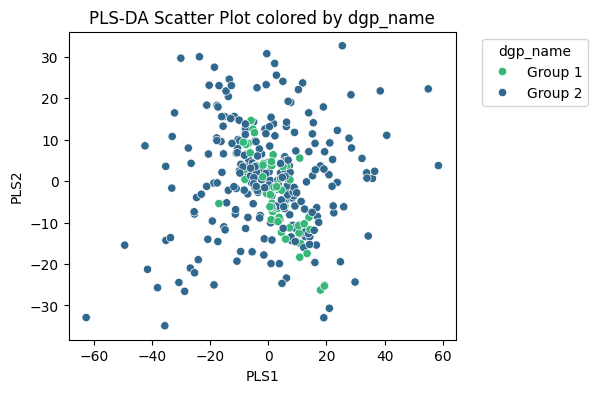

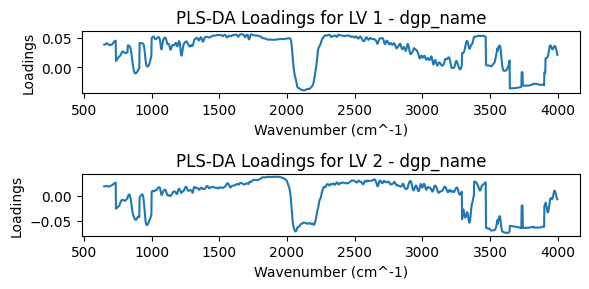

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.28      0.34      0.31       142
           2       0.19      0.19      0.19       135

    accuracy                           0.24       304
   macro avg       0.16      0.17      0.16       304
weighted avg       0.21      0.24      0.23       304

Confusion Matrix for tgp_name:
[[  0  14  13]
 [  0  48  94]
 [  0 110  25]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

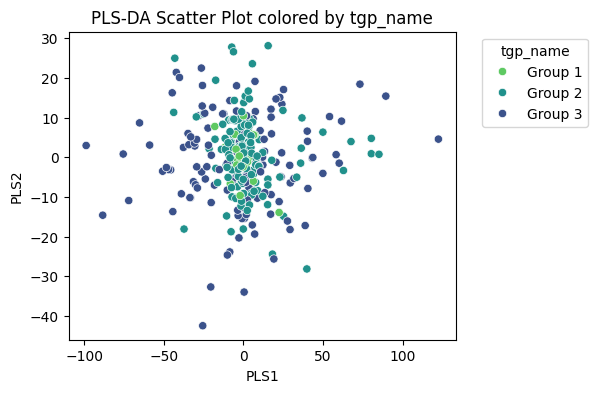

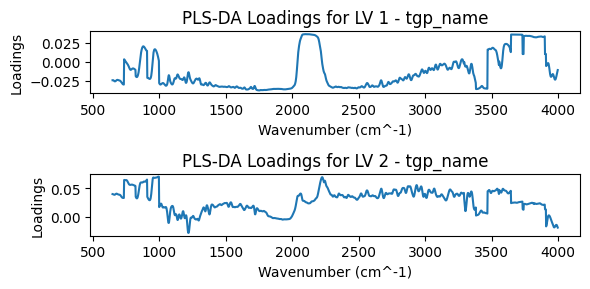

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        74
           2       0.41      0.82      0.55       139
           3       0.00      0.00      0.00        69

    accuracy                           0.38       304
   macro avg       0.10      0.21      0.14       304
weighted avg       0.19      0.38      0.25       304

Confusion Matrix for fgp_name:
[[  0   0  22   0]
 [  0   0  74   0]
 [  0  14 114  11]
 [  0   0  69   0]]


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

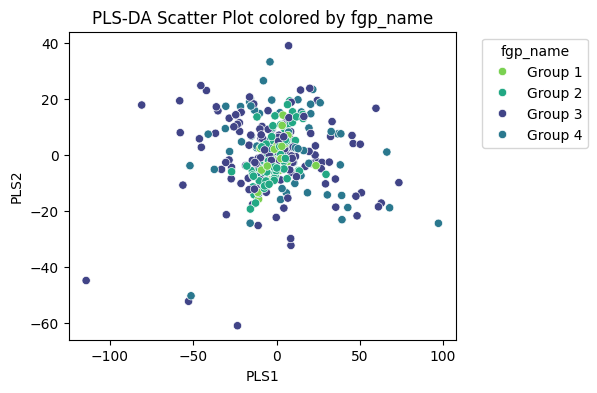

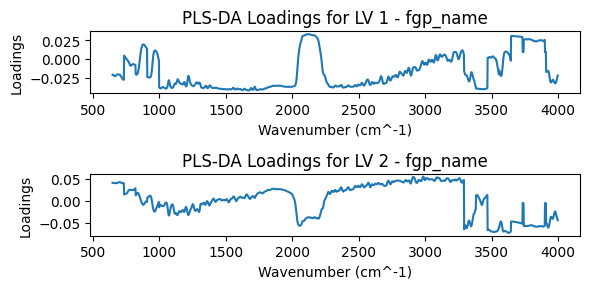

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.04      0.03      0.03       139
           1       0.00      0.00      0.00        13
           2       0.26      0.32      0.28       152

    accuracy                           0.17       304
   macro avg       0.10      0.12      0.11       304
weighted avg       0.14      0.17      0.16       304

Confusion Matrix for country_name:
[[  4   3 132]
 [  2   0  11]
 [103   0  49]]


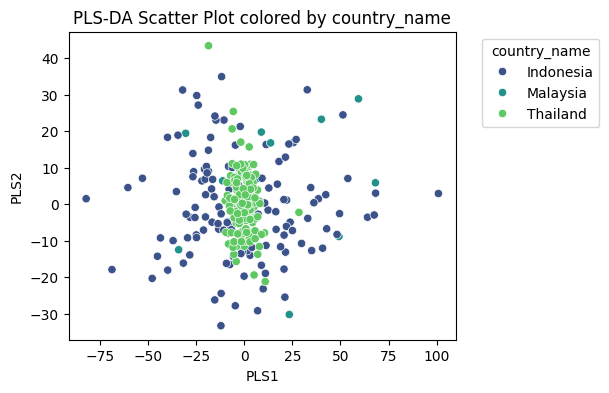

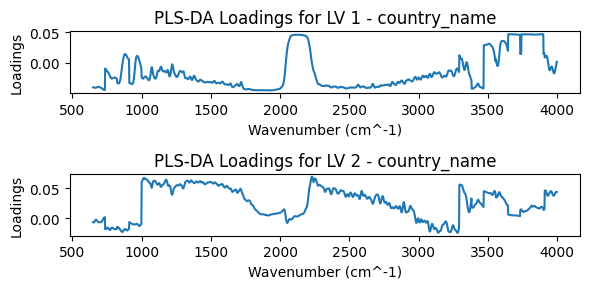

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       152
           1       0.05      0.05      0.05       152

    accuracy                           0.05       304
   macro avg       0.05      0.05      0.05       304
weighted avg       0.05      0.05      0.05       304

Confusion Matrix for thnoth_name:
[[  7 145]
 [144   8]]


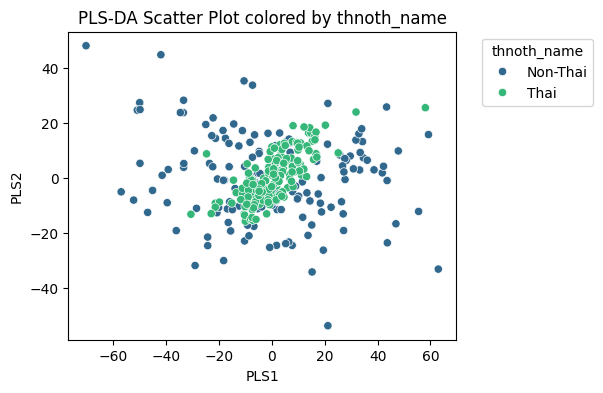

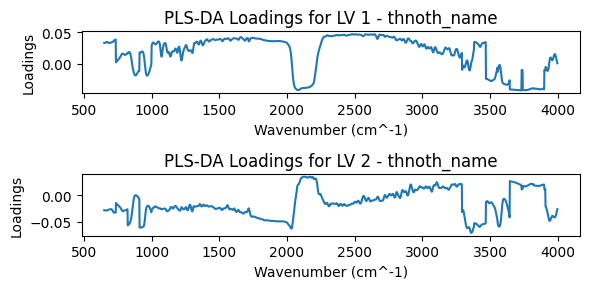

In [12]:
# Define a function to perform PLS-DA and visualize the results
def perform_pls_da(target_column_name, target_label):
    features_pls = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_pls = data_2[target_column_name]
    groups_pls = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_pls = LabelEncoder()
    targets_encoded_pls = label_encoder_pls.fit_transform(targets_pls)
    
    # Standardize the features
    scaler_pls = StandardScaler()
    X_scaled_pls = scaler_pls.fit_transform(features_pls)
    
    # Perform PLS-DA and LOGO-CV
    pls = PLSRegression(n_components=2)
    classifier_pls = LogisticRegression()
    
    logo_pls = LeaveOneGroupOut()
    y_true_pls = []
    y_pred_pls = []
    
    for train_idx_pls, test_idx_pls in logo_pls.split(X_scaled_pls, targets_encoded_pls, groups_pls):
        X_train_pls, X_test_pls = X_scaled_pls[train_idx_pls], X_scaled_pls[test_idx_pls]
        y_train_pls, y_test_pls = targets_encoded_pls[train_idx_pls], targets_encoded_pls[test_idx_pls]
        
        # Fit PLS-DA
        X_train_pls_transformed = pls.fit_transform(X_train_pls, y_train_pls)[0]
        X_test_pls_transformed = pls.transform(X_test_pls)
        
        # Train classifier
        classifier_pls.fit(X_train_pls_transformed, y_train_pls)
        
        # Predict
        y_pred_pls.extend(classifier_pls.predict(X_test_pls_transformed))
        y_true_pls.extend(y_test_pls)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_pls, y_pred_pls))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_pls, y_pred_pls))
    
    # Fit PLS-DA for visualization purposes
    X_pls_final = pls.fit_transform(X_scaled_pls, targets_encoded_pls)[0]
    
    # Create a DataFrame for the PLS-DA results
    pls_df = pd.DataFrame(data=X_pls_final, columns=['PLS1', 'PLS2'])
    pls_df[target_label] = targets_pls
    
    # Plotting PLS-DA scatter plot
    plt.figure(figsize=(5, 4))
    scatter_pls = sns.scatterplot(data=pls_df, x='PLS1', y='PLS2', hue=target_label, palette='viridis')
    plt.title(f'PLS-DA Scatter Plot colored by {target_label}')
    plt.xlabel('PLS1')
    plt.ylabel('PLS2')
    
    # Set legend in alphabetical order
    handles_pls, labels_pls = scatter_pls.get_legend_handles_labels()
    sorted_labels_pls = sorted(zip(labels_pls, handles_pls), key=lambda t: t[0])
    labels_pls, handles_pls = zip(*sorted_labels_pls)
    plt.legend(handles_pls, labels_pls, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_pls = pls.x_loadings_
    wavenumbers_pls = np.arange(650, 4000, (4000-650)/loadings_pls.shape[0])
    
    plt.figure(figsize=(6, 3))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers_pls, loadings_pls[:, 0])
    plt.title(f'PLS-DA Loadings for LV 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers_pls, loadings_pls[:, 1])
    plt.title(f'PLS-DA Loadings for LV 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    
    plt.tight_layout()
    plt.show()

# Perform PLS-DA for different target variables
perform_pls_da('dgp_name', 'dgp_name')
perform_pls_da('tgp_name', 'tgp_name')
perform_pls_da('fgp_name', 'fgp_name')
perform_pls_da('country_name', 'country_name')
perform_pls_da('thnoth_name', 'thnoth_name')

LDA


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.06      0.19      0.09        27
           1       0.46      0.44      0.45       142
           2       0.24      0.15      0.18       135

    accuracy                           0.29       304
   macro avg       0.25      0.26      0.24       304
weighted avg       0.33      0.29      0.30       304

Confusion Matrix for tgp_name:
[[ 5  5 17]
 [34 62 46]
 [47 68 20]]


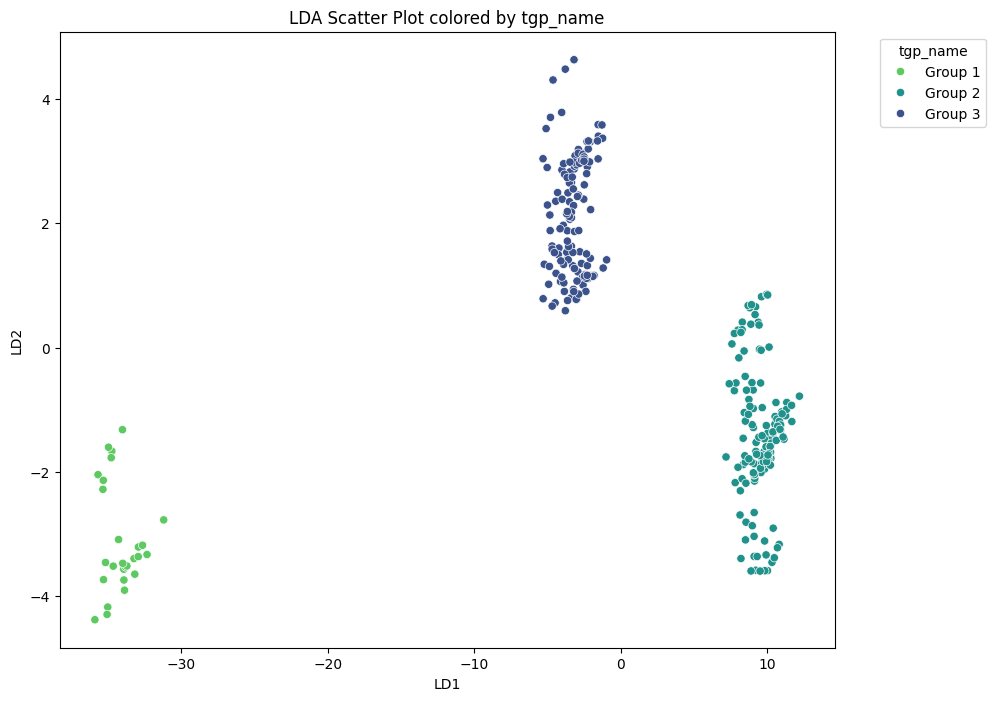

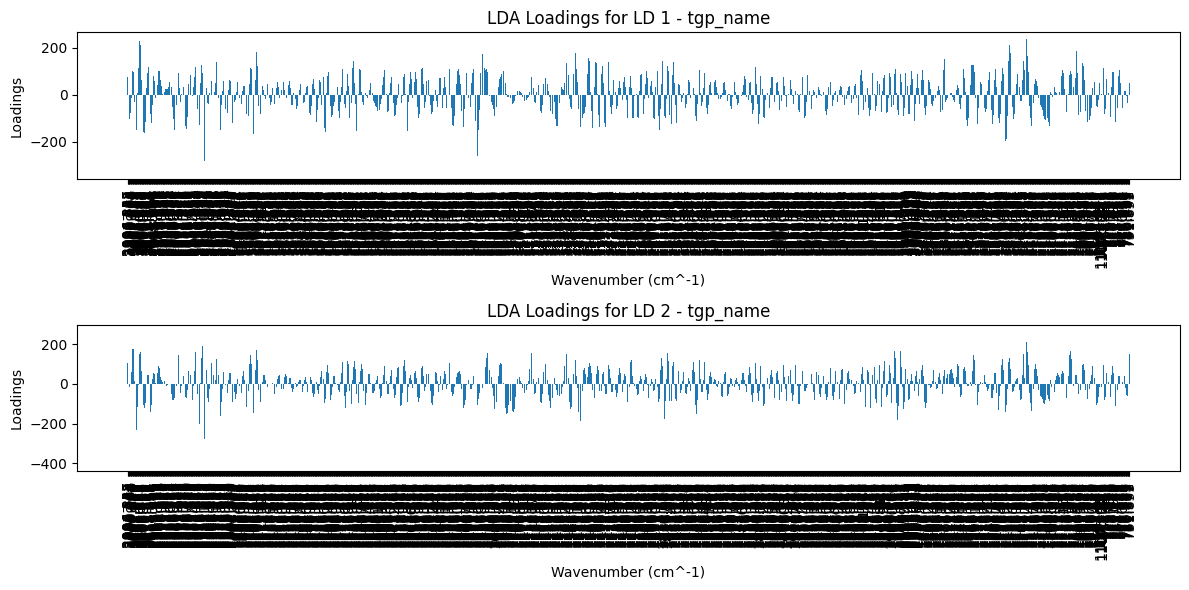

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.03      0.09      0.05        22
           1       0.20      0.35      0.25        74
           2       0.44      0.19      0.27       139
           3       0.33      0.23      0.27        69

    accuracy                           0.23       304
   macro avg       0.25      0.22      0.21       304
weighted avg       0.33      0.23      0.25       304

Confusion Matrix for fgp_name:
[[ 2  7  7  6]
 [21 26 15 12]
 [30 68 27 14]
 [10 31 12 16]]


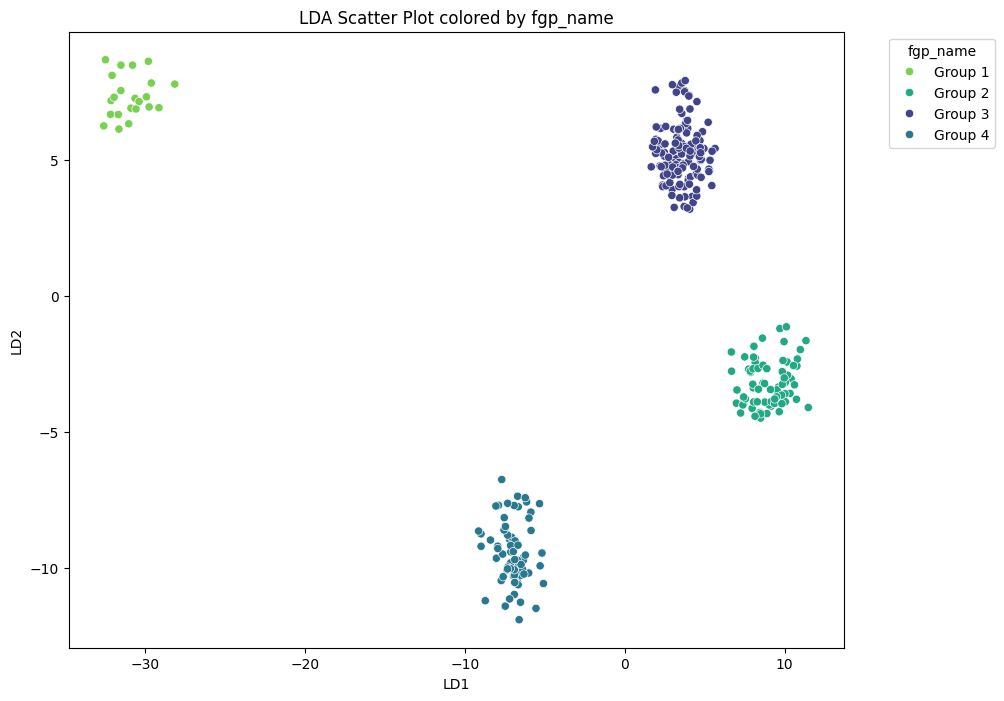

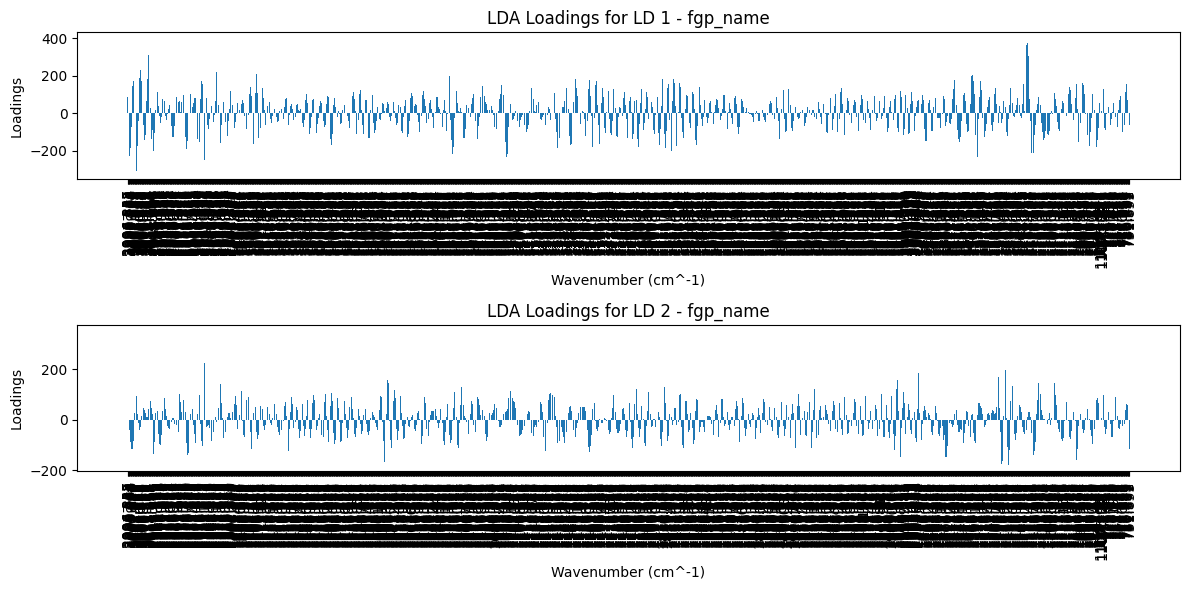

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       139
           1       0.04      0.15      0.06        13
           2       0.33      0.25      0.28       152

    accuracy                           0.29       304
   macro avg       0.24      0.25      0.23       304
weighted avg       0.32      0.29      0.30       304

Confusion Matrix for country_name:
[[47 21 71]
 [ 4  2  7]
 [87 27 38]]


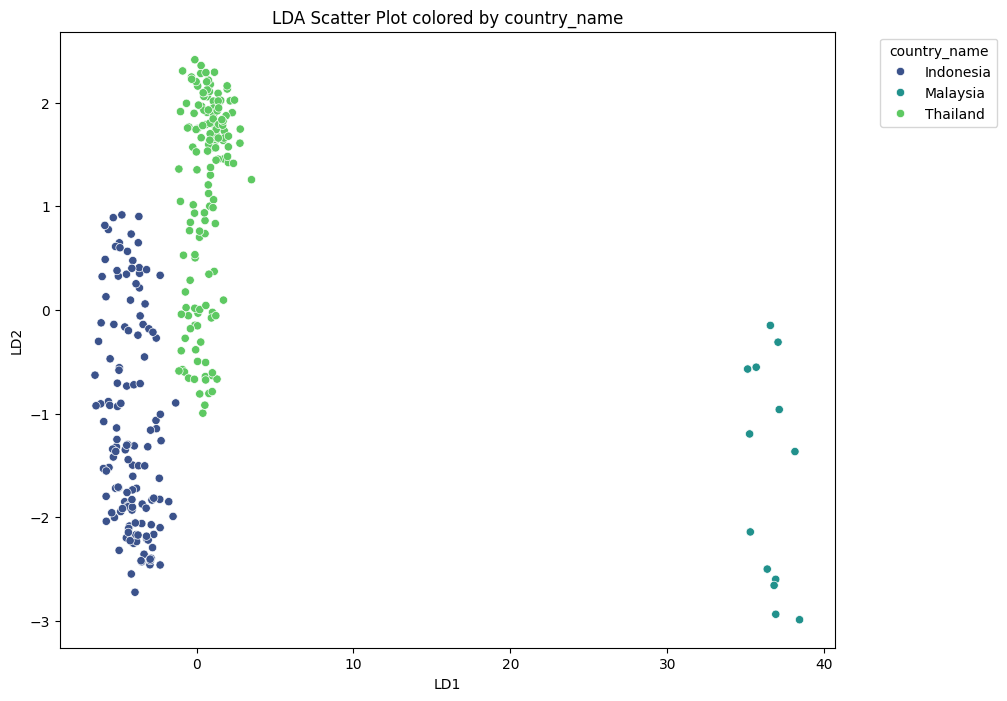

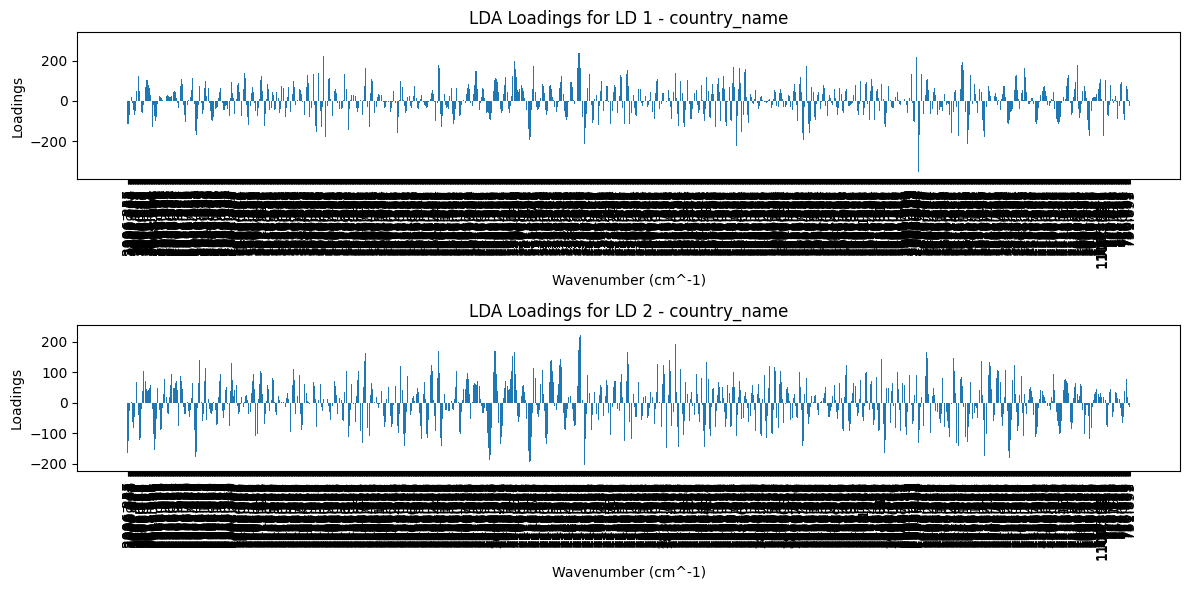

In [14]:

# Define a function to perform LDA and visualize the results
def perform_lda(target_column_name, target_label):
    features_lda = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda = data_2[target_column_name]
    groups_lda = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda = LabelEncoder()
    targets_encoded_lda = label_encoder_lda.fit_transform(targets_lda)
    
    # Standardize the features
    scaler_lda = StandardScaler()
    X_scaled_lda = scaler_lda.fit_transform(features_lda)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=2)
    classifier_lda = LogisticRegression()
    
    logo_lda = LeaveOneGroupOut()
    y_true_lda = []
    y_pred_lda = []
    
    for train_idx_lda, test_idx_lda in logo_lda.split(X_scaled_lda, targets_encoded_lda, groups_lda):
        X_train_lda, X_test_lda = X_scaled_lda[train_idx_lda], X_scaled_lda[test_idx_lda]
        y_train_lda, y_test_lda = targets_encoded_lda[train_idx_lda], targets_encoded_lda[test_idx_lda]
        
        # Fit LDA
        X_train_lda_transformed = lda.fit_transform(X_train_lda, y_train_lda)
        X_test_lda_transformed = lda.transform(X_test_lda)
        
        # Train classifier
        classifier_lda.fit(X_train_lda_transformed, y_train_lda)
        
        # Predict
        y_pred_lda.extend(classifier_lda.predict(X_test_lda_transformed))
        y_true_lda.extend(y_test_lda)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda, y_pred_lda))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda, y_pred_lda))
    
    # Fit LDA for visualization purposes
    X_lda_final = lda.fit_transform(X_scaled_lda, targets_encoded_lda)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_final, columns=['LD1', 'LD2'])
    lda_df[target_label] = targets_lda
    
    # Plotting LDA scatter plot
    plt.figure(figsize=(10, 8))
    scatter_lda = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
    plt.title(f'LDA Scatter Plot colored by {target_label}')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    # Set legend in alphabetical order
    handles_lda, labels_lda = scatter_lda.get_legend_handles_labels()
    sorted_labels_lda = sorted(zip(labels_lda, handles_lda), key=lambda t: t[0])
    labels_lda, handles_lda = zip(*sorted_labels_lda)
    plt.legend(handles_lda, labels_lda, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_lda = lda.scalings_
    wavenumbers = features_lda.columns  # Assuming feature columns are named by wavenumber
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.bar(wavenumbers, loadings_lda[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.bar(wavenumbers, loadings_lda[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda('tgp_name', 'tgp_name')
perform_lda('fgp_name', 'fgp_name')
perform_lda('country_name', 'country_name')

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.06      0.19      0.09        27
           1       0.46      0.44      0.45       142
           2       0.24      0.15      0.18       135

    accuracy                           0.29       304
   macro avg       0.25      0.26      0.24       304
weighted avg       0.33      0.29      0.30       304

Confusion Matrix for tgp_name:
[[ 5  5 17]
 [34 62 46]
 [47 68 20]]


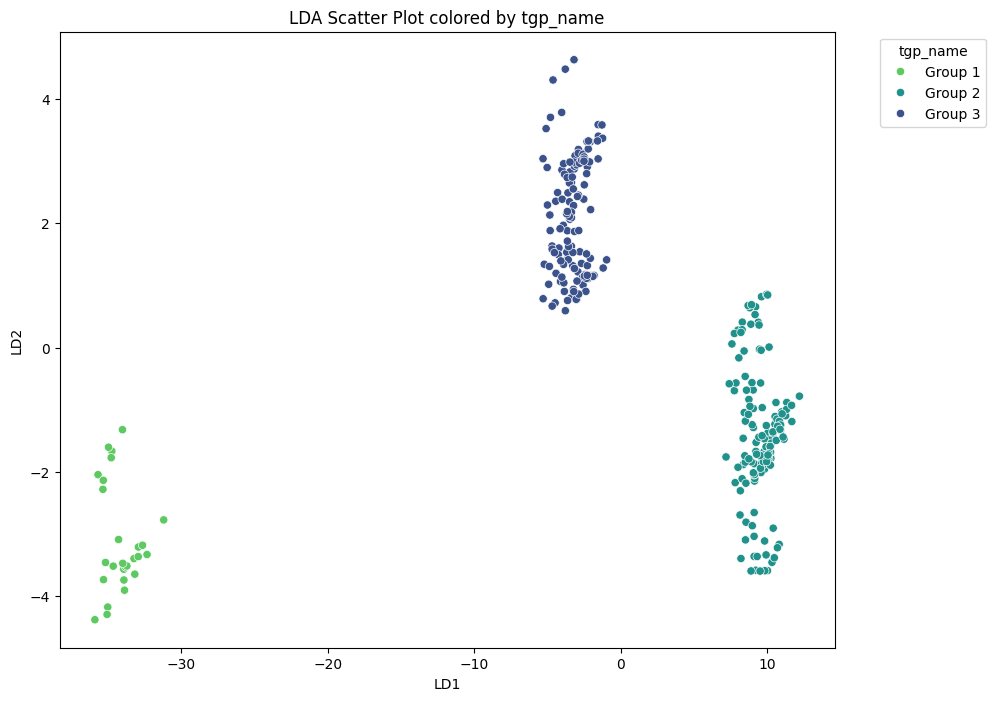

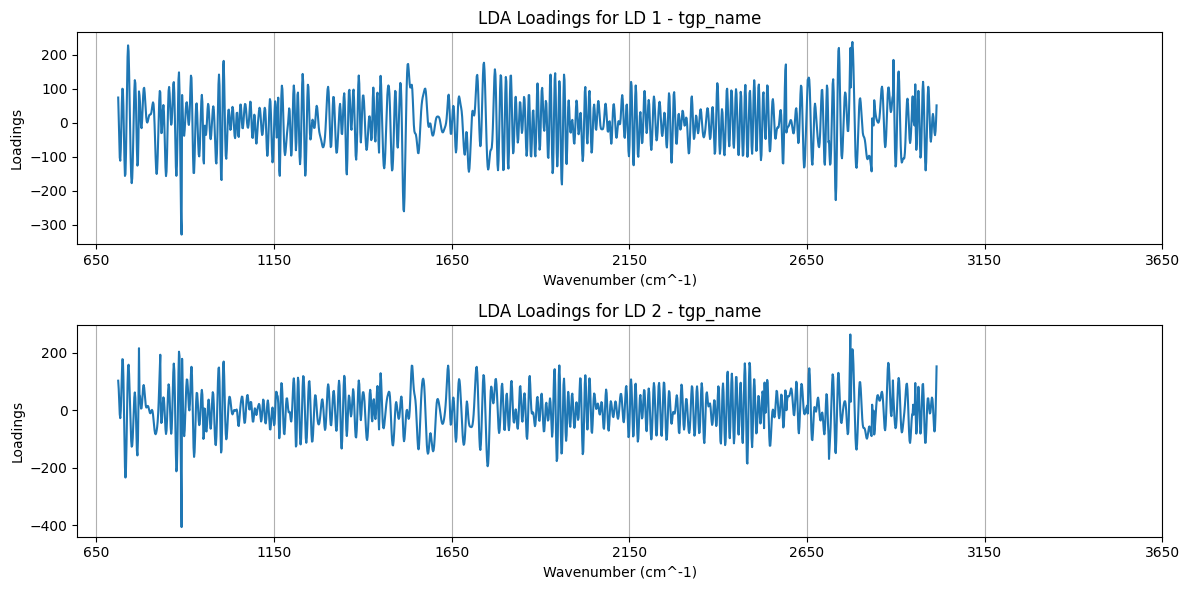

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.03      0.09      0.05        22
           1       0.20      0.35      0.25        74
           2       0.44      0.19      0.27       139
           3       0.33      0.23      0.27        69

    accuracy                           0.23       304
   macro avg       0.25      0.22      0.21       304
weighted avg       0.33      0.23      0.25       304

Confusion Matrix for fgp_name:
[[ 2  7  7  6]
 [21 26 15 12]
 [30 68 27 14]
 [10 31 12 16]]


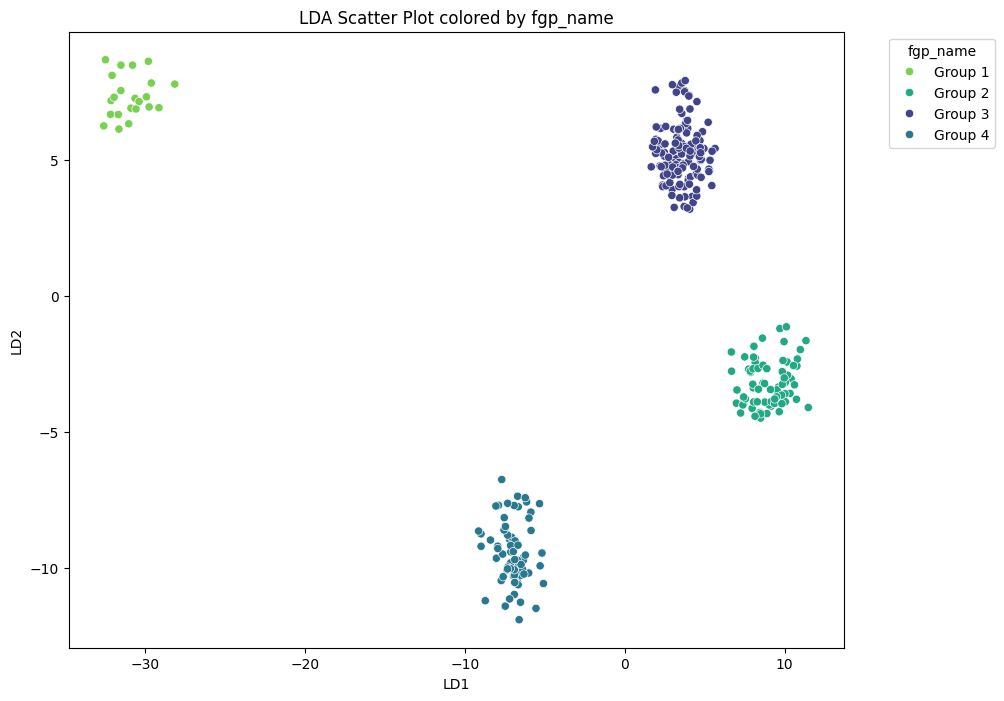

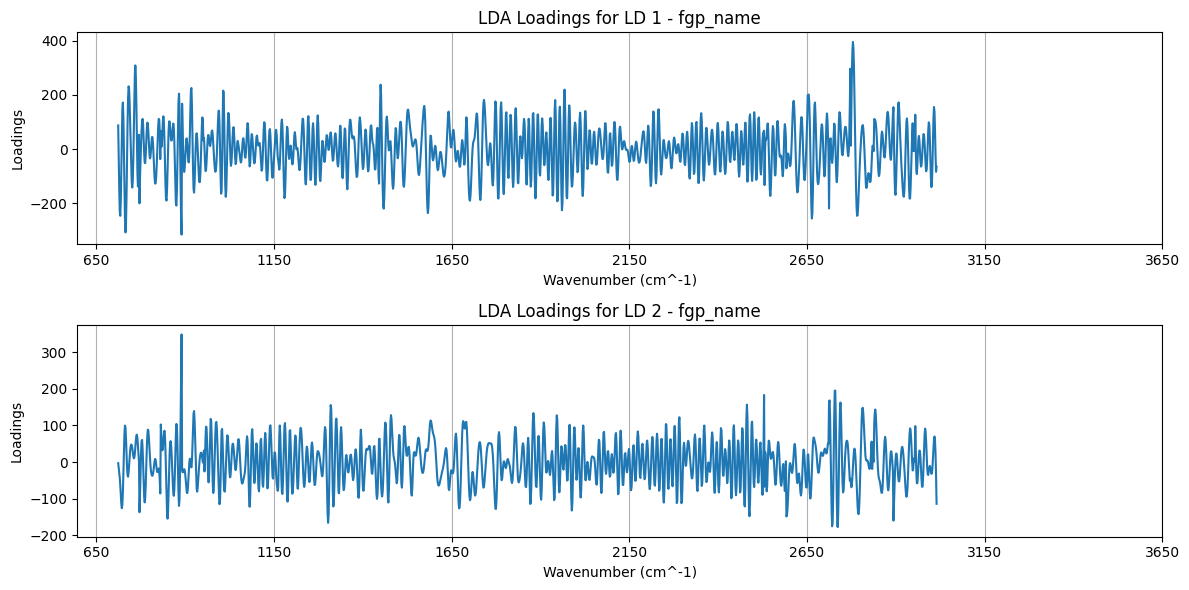

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       139
           1       0.04      0.15      0.06        13
           2       0.33      0.25      0.28       152

    accuracy                           0.29       304
   macro avg       0.24      0.25      0.23       304
weighted avg       0.32      0.29      0.30       304

Confusion Matrix for country_name:
[[47 21 71]
 [ 4  2  7]
 [87 27 38]]


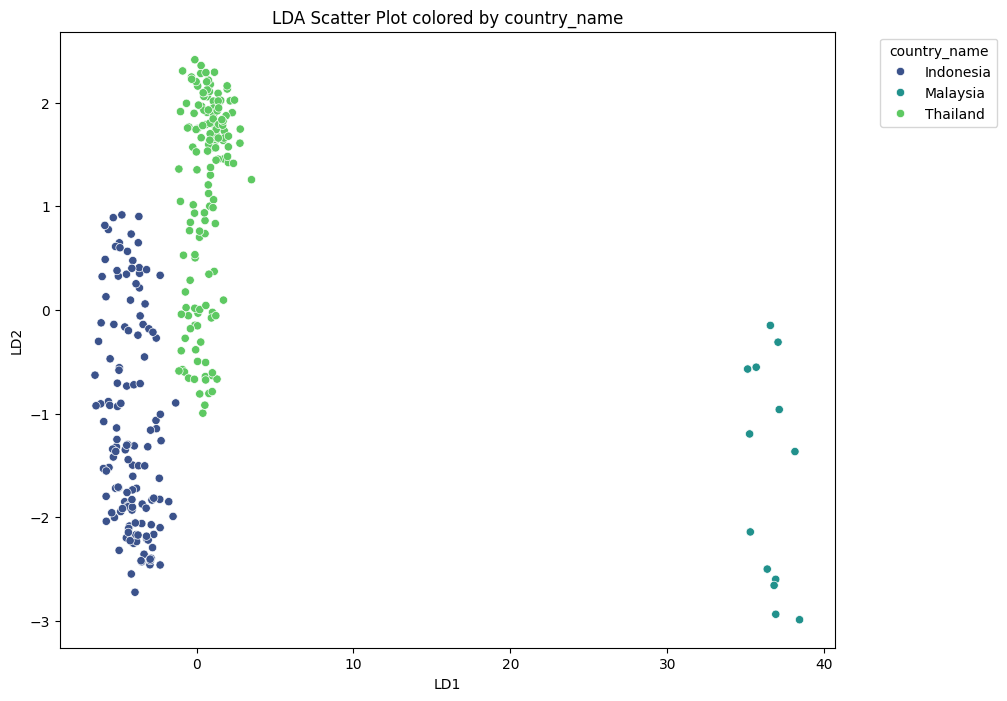

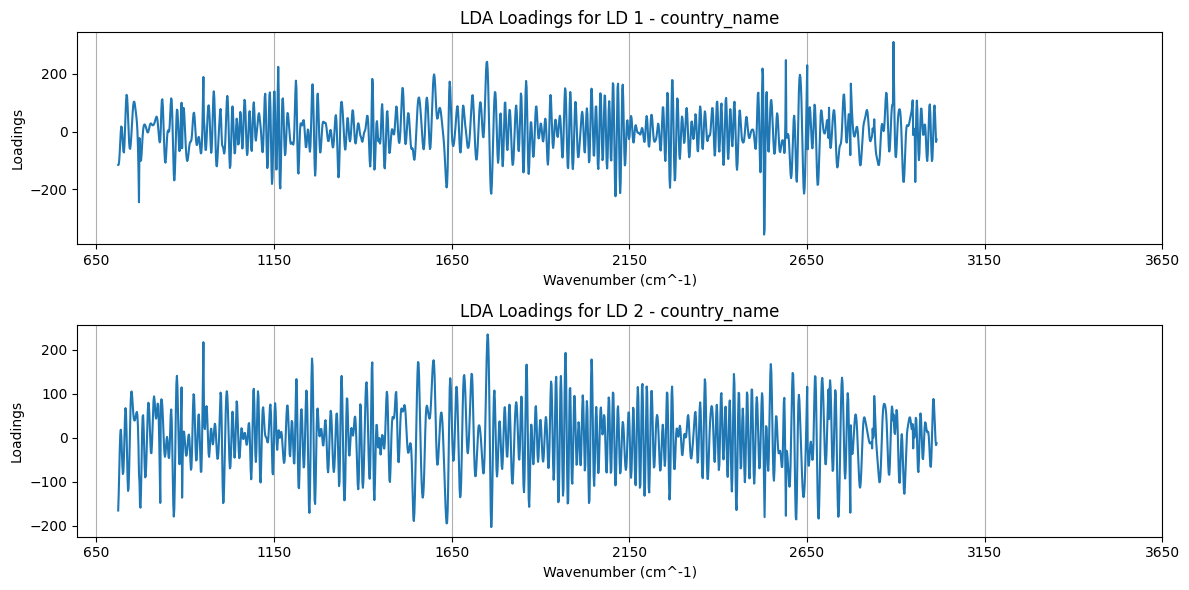

In [15]:
# Define a function to perform LDA and visualize the results
def perform_lda_1(target_column_name, target_label):
    features_lda_1 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_1 = data_2[target_column_name]
    groups_lda_1 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_1 = LabelEncoder()
    targets_encoded_lda_1 = label_encoder_lda_1.fit_transform(targets_lda_1)
    
    # Standardize the features
    scaler_lda_1 = StandardScaler()
    X_scaled_lda_1 = scaler_lda_1.fit_transform(features_lda_1)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=2)
    classifier_lda_1 = LogisticRegression()
    
    logo_lda_1 = LeaveOneGroupOut()
    y_true_lda_1 = []
    y_pred_lda_1 = []
    
    for train_idx_lda_1, test_idx_lda_1 in logo_lda_1.split(X_scaled_lda_1, targets_encoded_lda_1, groups_lda_1):
        X_train_lda_1, X_test_lda_1 = X_scaled_lda_1[train_idx_lda_1], X_scaled_lda_1[test_idx_lda_1]
        y_train_lda_1, y_test_lda_1 = targets_encoded_lda_1[train_idx_lda_1], targets_encoded_lda_1[test_idx_lda_1]
        
        # Fit LDA
        X_train_lda_1_transformed = lda.fit_transform(X_train_lda_1, y_train_lda_1)
        X_test_lda_1_transformed = lda.transform(X_test_lda_1)
        
        # Train classifier
        classifier_lda_1.fit(X_train_lda_1_transformed, y_train_lda_1)
        
        # Predict
        y_pred_lda_1.extend(classifier_lda_1.predict(X_test_lda_1_transformed))
        y_true_lda_1.extend(y_test_lda_1)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_1, y_pred_lda_1))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_1, y_pred_lda_1))
    
    # Fit LDA for visualization purposes
    X_lda_1_final = lda.fit_transform(X_scaled_lda_1, targets_encoded_lda_1)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_1_final, columns=['LD1', 'LD2'])
    lda_df[target_label] = targets_lda_1
    
    # Plotting LDA scatter plot
    plt.figure(figsize=(10, 8))
    scatter_lda_1 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
    plt.title(f'LDA Scatter Plot colored by {target_label}')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    # Set legend in alphabetical order
    handles_lda_1, labels_lda_1 = scatter_lda_1.get_legend_handles_labels()
    sorted_labels_lda_1 = sorted(zip(labels_lda_1, handles_lda_1), key=lambda t: t[0])
    labels_lda_1, handles_lda_1 = zip(*sorted_labels_lda_1)
    plt.legend(handles_lda_1, labels_lda_1, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    # Plotting the loadings
    loadings_lda_1 = lda.scalings_
    wavenumbers = np.arange(712, 3016, (3016-712)/loadings_lda_1.shape[0])
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers, loadings_lda_1[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers, loadings_lda_1[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda_1('tgp_name', 'tgp_name')
perform_lda_1('fgp_name', 'fgp_name')
perform_lda_1('country_name', 'country_name')

In [16]:
def plot_lda_loadings(loadings, wavenumbers, target_label):
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.plot(wavenumbers, loadings[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(650, 4000, 500), labels=np.arange(650, 4000, 500))
    plt.grid(True, which='both', axis='x')
    
    # Plot loadings for second component
    plt.subplot(2, 1, 2)
    plt.plot(wavenumbers, loadings[:, 1])
    plt.title(f'LDA Loadings for LD 2 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=np.arange(712, 3016, 500), labels=np.arange(712, 3016, 500))
    plt.grid(True, which='both', axis='x')
    
    plt.tight_layout()
    plt.show()


In [17]:
def most_influencing_wavenumbers(loadings, wavenumbers):
    influencing_wavenumbers = []
    for i in range(loadings.shape[1]):
        loading_series = pd.Series(loadings[:, i], index=wavenumbers)
        top_50 = loading_series.abs().nlargest(50).index
        influencing_wavenumbers.append((f'LD{i+1}', top_50))
    return influencing_wavenumbers

def print_influencing_wavenumbers_table(influencing_wavenumbers):
    for ld, wavenumbers in influencing_wavenumbers:
        print(f'\nTop 50 influencing wavenumbers for {ld}:')
        print(wavenumbers)


Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.12      0.33      0.18        55
           1       0.77      0.49      0.59       249

    accuracy                           0.46       304
   macro avg       0.44      0.41      0.39       304
weighted avg       0.65      0.46      0.52       304

Confusion Matrix for dgp_name:
[[ 18  37]
 [128 121]]


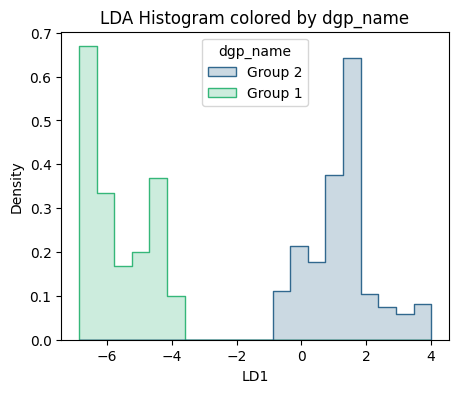

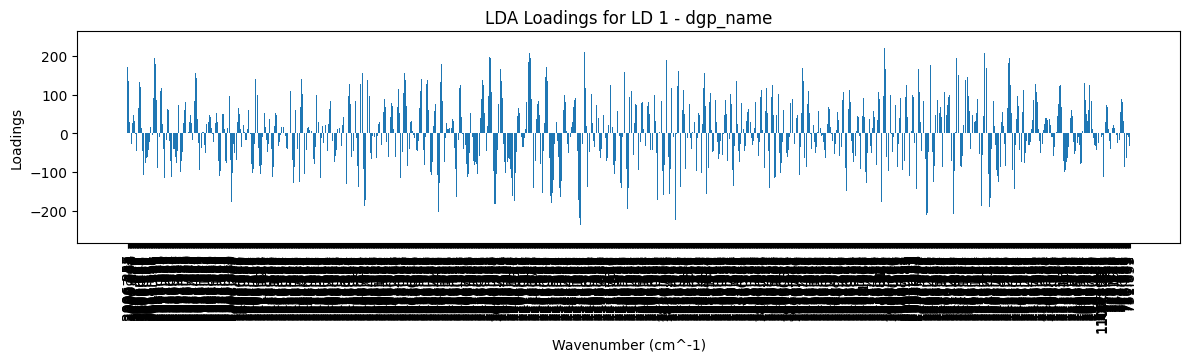

Classification Report for thnoth_name:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       152
           1       0.32      0.34      0.33       152

    accuracy                           0.31       304
   macro avg       0.31      0.31      0.31       304
weighted avg       0.31      0.31      0.31       304

Confusion Matrix for thnoth_name:
[[ 43 109]
 [100  52]]


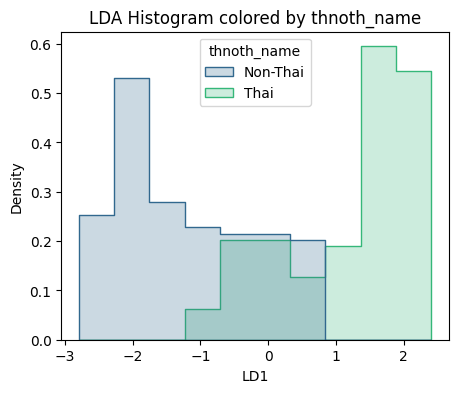

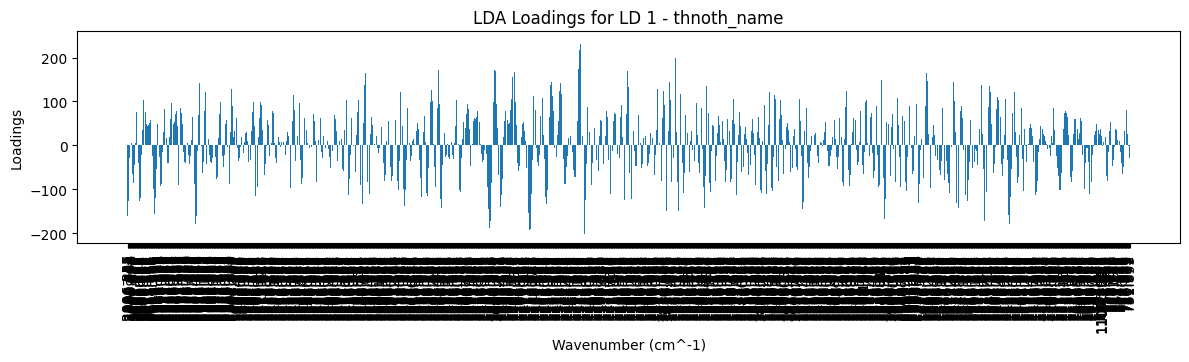

Classification Report for tgp_name:
              precision    recall  f1-score   support

           0       0.06      0.19      0.09        27
           1       0.46      0.44      0.45       142
           2       0.24      0.15      0.18       135

    accuracy                           0.29       304
   macro avg       0.25      0.26      0.24       304
weighted avg       0.33      0.29      0.30       304

Confusion Matrix for tgp_name:
[[ 5  5 17]
 [34 62 46]
 [47 68 20]]


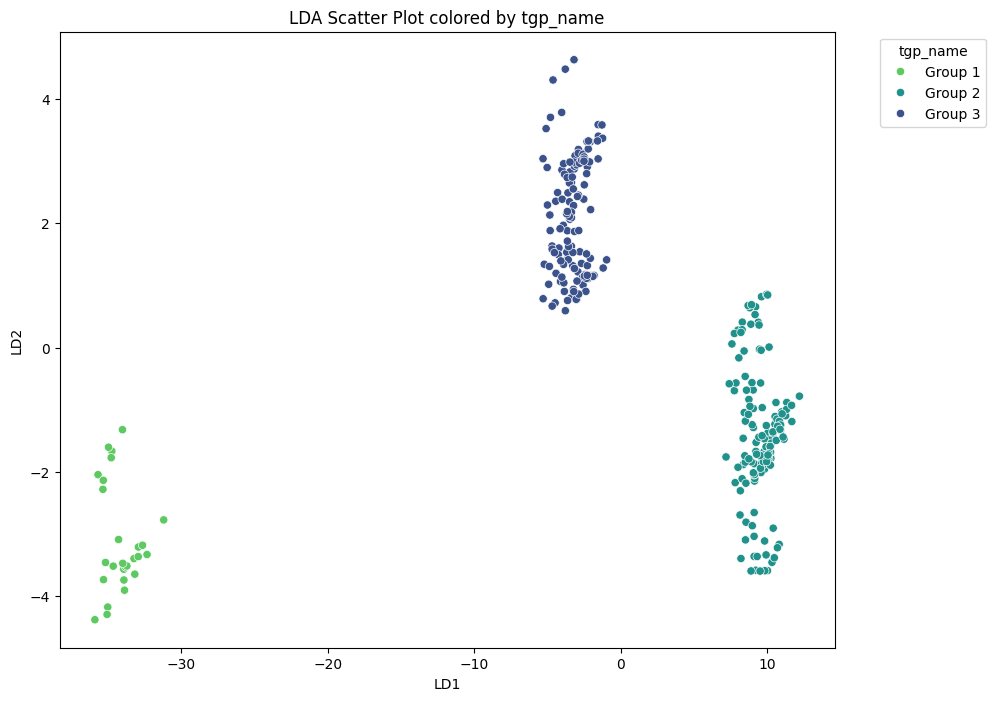

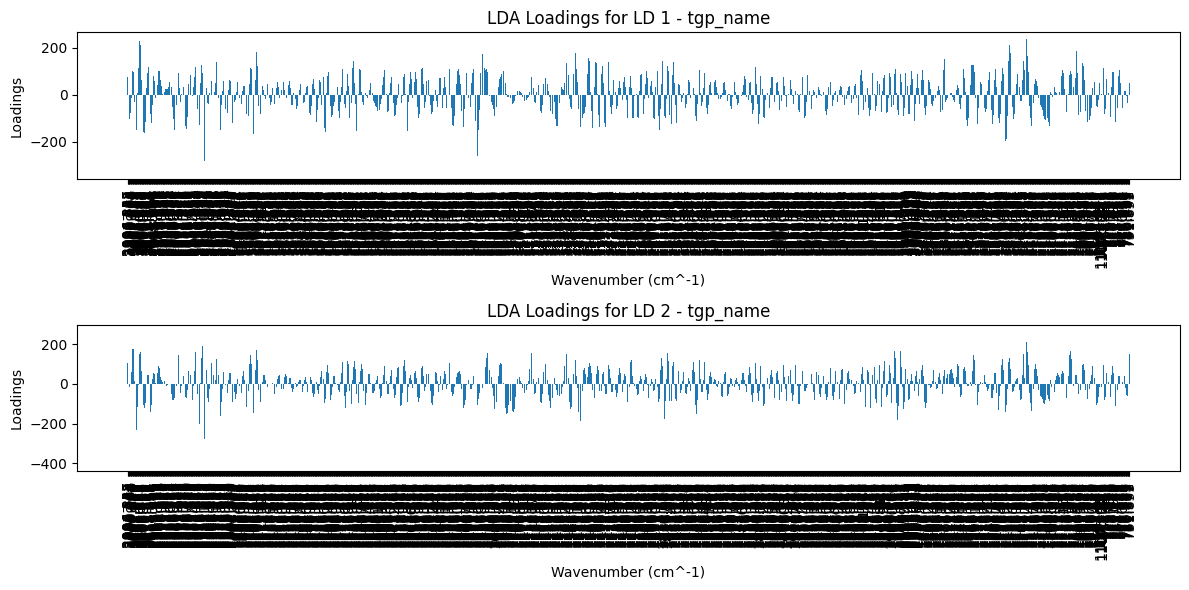

Classification Report for fgp_name:
              precision    recall  f1-score   support

           0       0.03      0.09      0.05        22
           1       0.20      0.35      0.25        74
           2       0.44      0.19      0.27       139
           3       0.33      0.23      0.27        69

    accuracy                           0.23       304
   macro avg       0.25      0.22      0.21       304
weighted avg       0.33      0.23      0.25       304

Confusion Matrix for fgp_name:
[[ 2  7  7  6]
 [21 26 15 12]
 [30 68 27 14]
 [10 31 12 16]]


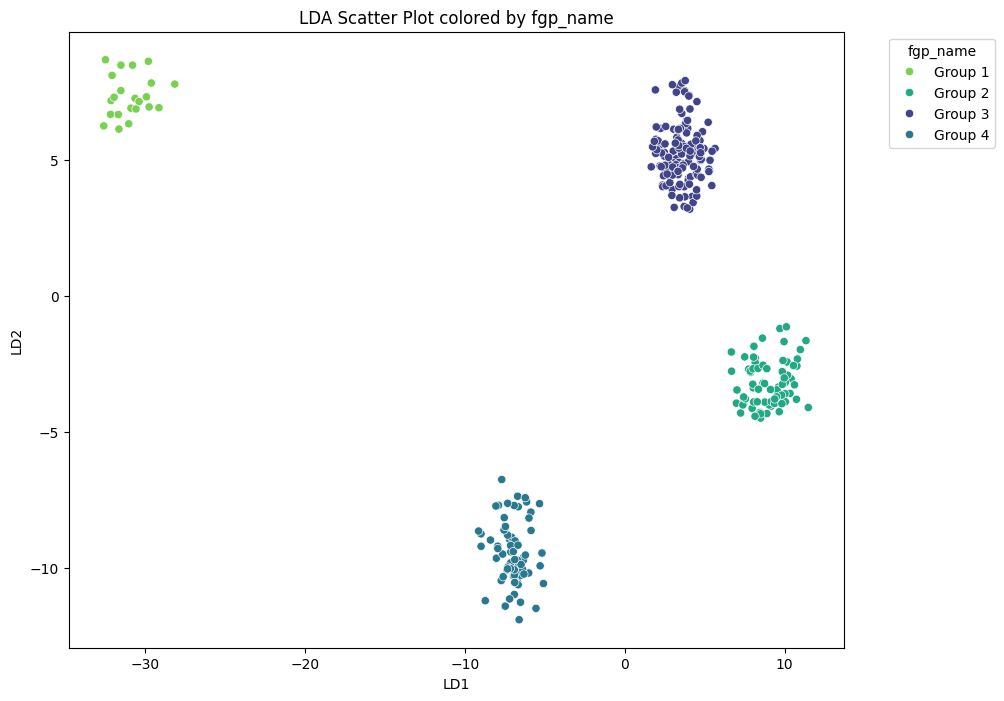

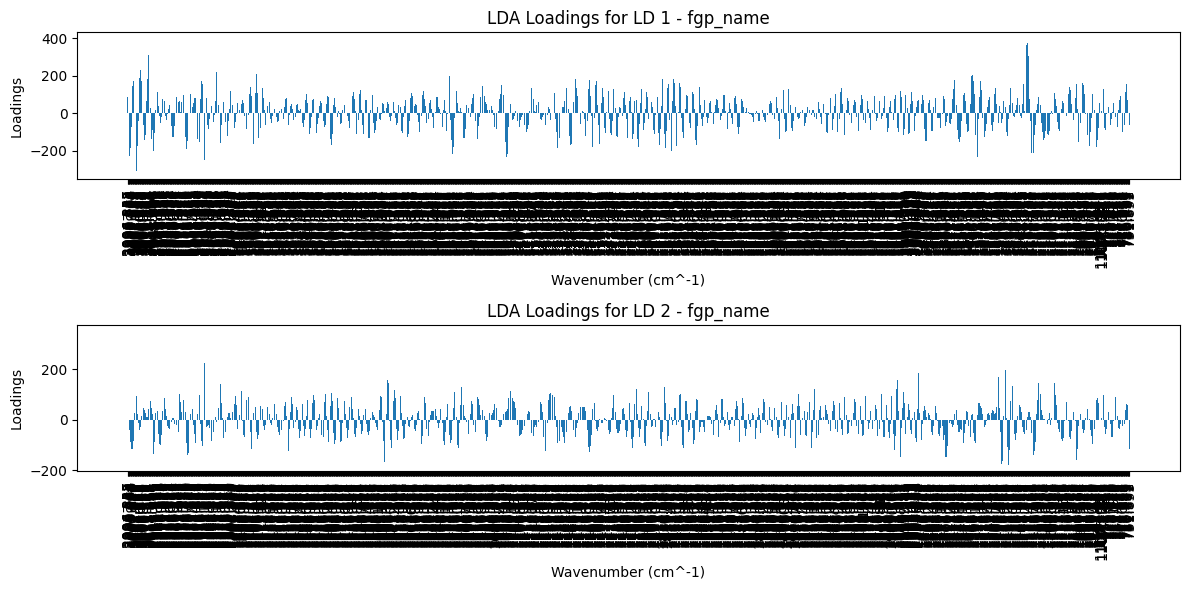

Classification Report for country_name:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       139
           1       0.04      0.15      0.06        13
           2       0.33      0.25      0.28       152

    accuracy                           0.29       304
   macro avg       0.24      0.25      0.23       304
weighted avg       0.32      0.29      0.30       304

Confusion Matrix for country_name:
[[47 21 71]
 [ 4  2  7]
 [87 27 38]]


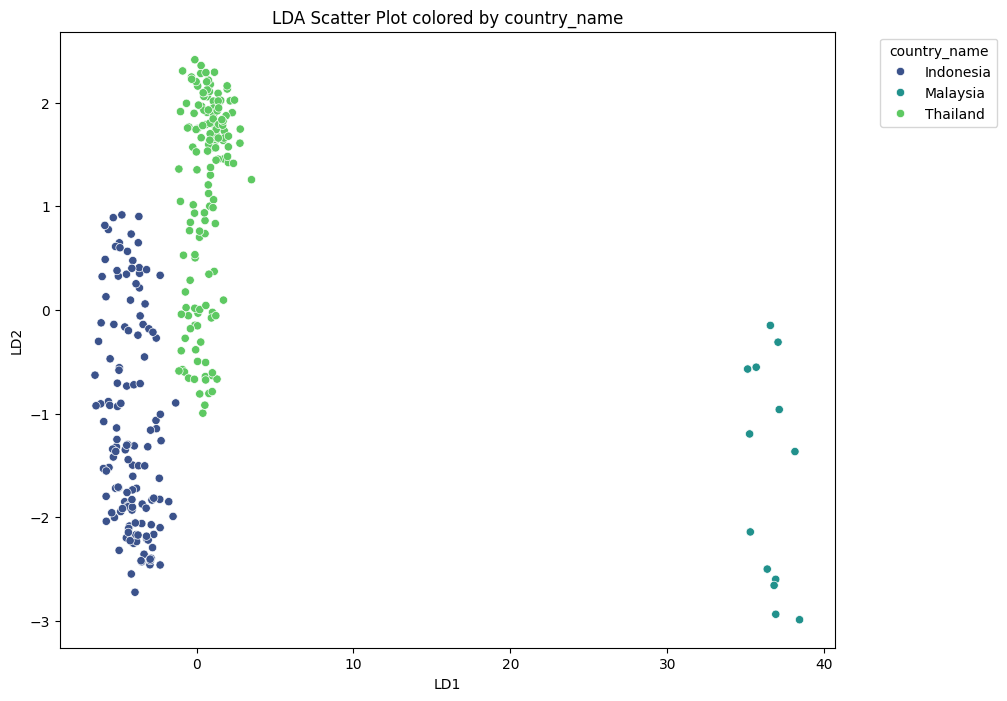

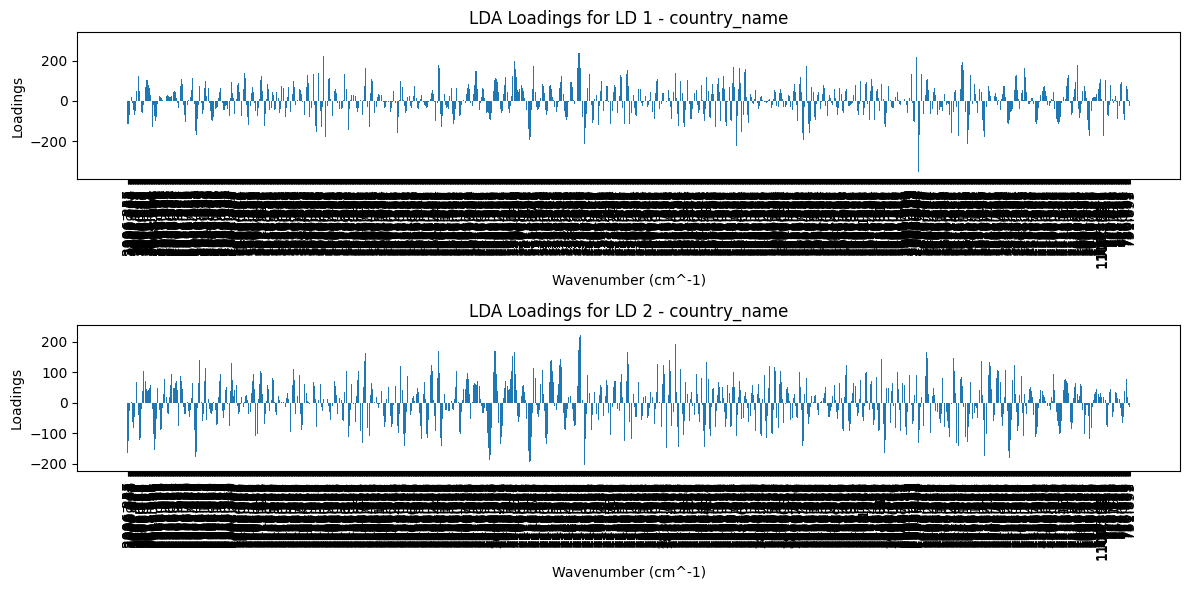

In [18]:
# Define a function to perform LDA and visualize the results
def perform_lda_2(target_column_name, target_label, n_components=2):
    features_lda_2 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_2 = data_2[target_column_name]
    groups_lda_2 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_2 = LabelEncoder()
    targets_encoded_lda_2 = label_encoder_lda_2.fit_transform(targets_lda_2)
    
    # Standardize the features
    scaler_lda_2 = StandardScaler()
    X_scaled_lda_2 = scaler_lda_2.fit_transform(features_lda_2)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    classifier_lda_2 = LogisticRegression()
    
    logo_lda_2 = LeaveOneGroupOut()
    y_true_lda_2 = []
    y_pred_lda_2 = []
    
    for train_idx_lda_2, test_idx_lda_2 in logo_lda_2.split(X_scaled_lda_2, targets_encoded_lda_2, groups_lda_2):
        X_train_lda_2, X_test_lda_2 = X_scaled_lda_2[train_idx_lda_2], X_scaled_lda_2[test_idx_lda_2]
        y_train_lda_2, y_test_lda_2 = targets_encoded_lda_2[train_idx_lda_2], targets_encoded_lda_2[test_idx_lda_2]
        
        # Fit LDA
        X_train_lda_2_transformed = lda.fit_transform(X_train_lda_2, y_train_lda_2)
        X_test_lda_2_transformed = lda.transform(X_test_lda_2)
        
        # Train classifier
        classifier_lda_2.fit(X_train_lda_2_transformed, y_train_lda_2)
        
        # Predict
        y_pred_lda_2.extend(classifier_lda_2.predict(X_test_lda_2_transformed))
        y_true_lda_2.extend(y_test_lda_2)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_2, y_pred_lda_2))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_2, y_pred_lda_2))
    
    # Fit LDA for visualization purposes
    X_lda_2_final = lda.fit_transform(X_scaled_lda_2, targets_encoded_lda_2)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_2_final, columns=[f'LD{i+1}' for i in range(n_components)])
    lda_df[target_label] = targets_lda_2
    
    if n_components == 1:
        # Plotting LDA histogram for binary classification
        plt.figure(figsize=(5, 4))
        sns.histplot(data=lda_df, x='LD1', hue=target_label, element='step', stat='density', common_norm=False, palette='viridis')
        plt.title(f'LDA Histogram colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('Density')
        plt.show()
    else:
        # Plotting LDA scatter plot for multi-class classification
        plt.figure(figsize=(10, 8))
        scatter_lda_2 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
        plt.title(f'LDA Scatter Plot colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        
        # Set legend in alphabetical order
        handles_lda_2, labels_lda_2 = scatter_lda_2.get_legend_handles_labels()
        sorted_labels_lda_2 = sorted(zip(labels_lda_2, handles_lda_2), key=lambda t: t[0])
        labels_lda_2, handles_lda_2 = zip(*sorted_labels_lda_2)
        plt.legend(handles_lda_2, labels_lda_2, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.show()
    
    # Plotting the loadings
    loadings_lda_2 = lda.scalings_
    wavenumbers = features_lda_2.columns  # Assuming feature columns are named by wavenumber
    
    plt.figure(figsize=(12, 6))
    
    # Plot loadings for first component
    plt.subplot(2, 1, 1)
    plt.bar(wavenumbers, loadings_lda_2[:, 0])
    plt.title(f'LDA Loadings for LD 1 - {target_label}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    
    if n_components > 1:
        # Plot loadings for second component
        plt.subplot(2, 1, 2)
        plt.bar(wavenumbers, loadings_lda_2[:, 1])
        plt.title(f'LDA Loadings for LD 2 - {target_label}')
        plt.xlabel('Wavenumber (cm^-1)')
        plt.ylabel('Loadings')
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Perform LDA for different target variables
perform_lda_2('dgp_name', 'dgp_name', n_components=1)  # Binary classification
perform_lda_2('thnoth_name', 'thnoth_name', n_components=1)  # Binary classification

perform_lda_2('tgp_name', 'tgp_name', n_components=2)  # Multi-class classification
perform_lda_2('fgp_name', 'fgp_name', n_components=2)  # Multi-class classification
perform_lda_2('country_name', 'country_name', n_components=2)  # Multi-class classification

Classification Report for dgp_name:
              precision    recall  f1-score   support

           0       0.12      0.33      0.18        55
           1       0.77      0.49      0.59       249

    accuracy                           0.46       304
   macro avg       0.44      0.41      0.39       304
weighted avg       0.65      0.46      0.52       304

Confusion Matrix for dgp_name:
[[ 18  37]
 [128 121]]


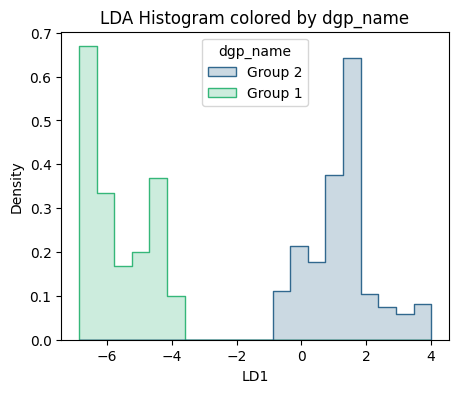

ValueError: could not convert string to float: '1106.458.1'

In [19]:
# Define a function to perform LDA and visualize the results
def perform_lda_2(target_column_name, target_label, n_components=2):
    features_lda_2 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
    targets_lda_2 = data_2[target_column_name]
    groups_lda_2 = data_2['prov_char']
    
    # Encode the target labels
    label_encoder_lda_2 = LabelEncoder()
    targets_encoded_lda_2 = label_encoder_lda_2.fit_transform(targets_lda_2)
    
    # Standardize the features
    scaler_lda_2 = StandardScaler()
    X_scaled_lda_2 = scaler_lda_2.fit_transform(features_lda_2)
    
    # Perform LDA and LOGO-CV
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    classifier_lda_2 = LogisticRegression()
    
    logo_lda_2 = LeaveOneGroupOut()
    y_true_lda_2 = []
    y_pred_lda_2 = []
    
    for train_idx_lda_2, test_idx_lda_2 in logo_lda_2.split(X_scaled_lda_2, targets_encoded_lda_2, groups_lda_2):
        X_train_lda_2, X_test_lda_2 = X_scaled_lda_2[train_idx_lda_2], X_scaled_lda_2[test_idx_lda_2]
        y_train_lda_2, y_test_lda_2 = targets_encoded_lda_2[train_idx_lda_2], targets_encoded_lda_2[test_idx_lda_2]
        
        # Fit LDA
        X_train_lda_2_transformed = lda.fit_transform(X_train_lda_2, y_train_lda_2)
        X_test_lda_2_transformed = lda.transform(X_test_lda_2)
        
        # Train classifier
        classifier_lda_2.fit(X_train_lda_2_transformed, y_train_lda_2)
        
        # Predict
        y_pred_lda_2.extend(classifier_lda_2.predict(X_test_lda_2_transformed))
        y_true_lda_2.extend(y_test_lda_2)
    
    # Evaluate the classifier
    print(f"Classification Report for {target_label}:")
    print(classification_report(y_true_lda_2, y_pred_lda_2))
    
    print(f"Confusion Matrix for {target_label}:")
    print(confusion_matrix(y_true_lda_2, y_pred_lda_2))
    
    # Fit LDA for visualization purposes
    X_lda_2_final = lda.fit_transform(X_scaled_lda_2, targets_encoded_lda_2)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(data=X_lda_2_final, columns=[f'LD{i+1}' for i in range(n_components)])
    lda_df[target_label] = targets_lda_2
    
    if n_components == 1:
        # Plotting LDA histogram for binary classification
        plt.figure(figsize=(5, 4))
        sns.histplot(data=lda_df, x='LD1', hue=target_label, element='step', stat='density', common_norm=False, palette='viridis')
        plt.title(f'LDA Histogram colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('Density')
        plt.show()
    else:
        # Plotting LDA scatter plot for multi-class classification
        plt.figure(figsize=(10, 8))
        scatter_lda_2 = sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=target_label, palette='viridis')
        plt.title(f'LDA Scatter Plot colored by {target_label}')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        
        # Set legend in alphabetical order
        handles_lda_2, labels_lda_2 = scatter_lda_2.get_legend_handles_labels()
        sorted_labels_lda_2 = sorted(zip(labels_lda_2, handles_lda_2), key=lambda t: t[0])
        labels_lda_2, handles_lda_2 = zip(*sorted_labels_lda_2)
        plt.legend(handles_lda_2, labels_lda_2, title=target_label, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.show()

    # Visualize loadings with bar charts
    def plot_lda_loadings(loadings, wavenumbers, target_label):
        plt.figure(figsize=(12, 6))
        
        # Bar chart for first component
        plt.subplot(2, 1, 1)
        plt.bar(wavenumbers, loadings[:, 0])
        plt.title(f'LDA Loadings for LD 1 - {target_label}')
        plt.xlabel('Wavenumber (cm^-1)')
        plt.ylabel('Loadings')
        plt.xticks(ticks=np.arange(712, 3016, 500), labels=np.arange(712, 3016, 500))
        plt.grid(True, which='both', axis='x')
        
        if n_components > 1:
            # Bar chart for second component
            plt.subplot(2, 1, 2)
            plt.bar(wavenumbers, loadings[:, 1])
            plt.title(f'LDA Loadings for LD 2 - {target_label}')
            plt.xlabel('Wavenumber (cm^-1)')
            plt.ylabel('Loadings')
            plt.xticks(ticks=np.arange(712, 3016, 500), labels=np.arange(712, 3016, 500))
            plt.grid(True, which='both', axis='x')
        
        plt.tight_layout()
        plt.show()
    
    # Plotting the loadings
    loadings_lda_2 = lda.scalings_
    wavenumbers = features_lda_2.columns.astype(float)  # Assuming feature columns are named by wavenumber
    plot_lda_loadings(loadings_lda_2, wavenumbers, target_label)

    # Table of 30 most influencing wavenumbers
    def most_influencing_wavenumbers(loadings, wavenumbers):
        influencing_wavenumbers = []
        for i in range(loadings.shape[1]):
            loading_series = pd.Series(loadings[:, i], index=wavenumbers)
            top_30 = loading_series.abs().nlargest(30).index
            influencing_wavenumbers.append((f'LD{i+1}', top_30))
        return influencing_wavenumbers

    def print_influencing_wavenumbers_table(influencing_wavenumbers):
        for ld, wavenumbers in influencing_wavenumbers:
            print(f'\nTop 30 influencing wavenumbers for {ld}:')
            print(wavenumbers)

    # Example usage:
    influencing_wavenumbers = most_influencing_wavenumbers(loadings_lda_2, wavenumbers)
    print_influencing_wavenumbers_table(influencing_wavenumbers)

# Perform LDA for different target variables
perform_lda_2('dgp_name', 'dgp_name', n_components=1)  # Binary classification
perform_lda_2('thnoth_name', 'thnoth_name', n_components=1)  # Binary classification

perform_lda_2('tgp_name', 'tgp_name', n_components=2)  # Multi-class classification
perform_lda_2('fgp_name', 'fgp_name', n_components=2)  # Multi-class classification
perform_lda_2('country_name', 'country_name', n_components=2)  # Multi-class classification